In [1]:
from Inpainting.Inpainter import Inpainter
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from common_functions import show

In [2]:
def contour_mask(img, gray, save_path, pixel_border):
    # Применение фильтрации Гаусса для сглаживания изображения и уменьшения шума
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Применение алгоритма Кэнни для обнаружения границ
    edges = cv2.Canny(blurred, 50, 150)
    
    # Отрисовка контуров 
    _, binary_mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    colored_part = cv2.bitwise_and(img, img, mask=binary_mask)
    binary_image = cv2.cvtColor(colored_part, cv2.COLOR_RGB2GRAY)
    _, binary_image = cv2.threshold(binary_image, 1, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(edges.copy(), None, iterations=pixel_border)
    mask = cv2.bitwise_not(binary_image)
    contour_image = cv2.bitwise_and(cv2.cvtColor(dilated, cv2.COLOR_GRAY2BGR), cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
    
    # Отображение результатов
    show(contour_image)

    cv2.imwrite(save_path, contour_image)

In [3]:
def inpaint(orig_img_name, mask_img_name, result_img_name, resize_size, halfPatchWidth):
    originalImage = cv2.imread(orig_img_name)
    # originalImage = cv2.resize(originalImage, (resize_size, resize_size))

    if originalImage is None:
        print('Error: Unable to open Input image.')
        exit(-1)


    mask = cv2.imread(mask_img_name)
    inpaintMask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    # inpaintMask = cv2.resize(inpaintMask, (resize_size, resize_size))

    if inpaintMask is None:
        print('Error: Unable to open Mask image.')
        exit(-1)

    i = Inpainter(originalImage, inpaintMask, halfPatchWidth)
    i.inpaint()

    cv2.imwrite(result_img_name, i.result)

    # if i.checkValidInputs()== i.CHECK_VALID:
    #     i.inpaint()
    #     cv2.imwrite(result_img_name, i.result)
    # else:
    #     print('Error: invalid parameters.')

### test1

In [4]:
folder_path = Path("pics/test1/split_results")
file_names = [f.name for f in folder_path.iterdir() if f.is_file()]

print(file_names)


['fragment_2.png', 'fragment_3.png', 'fragment_1.png', 'fragment_4.png', 'fragment_5.png', 'fragment_6.png']


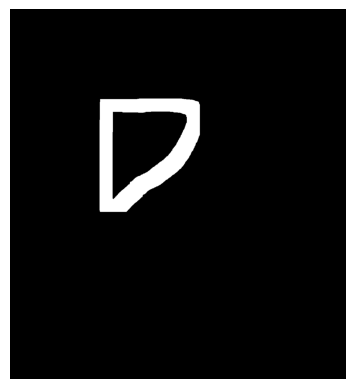

In [5]:
pixel_border = 45

for i in range(len(file_names)):
    image = cv2.imread(f'pics/test1/split_results/{file_names[i]}')
    save_path = f'pics/test1/extrapolation_masks/{file_names[i]}'
    
    img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    contour_mask(img, gray, save_path, pixel_border)

In [6]:
halfPatchWidth = 16
resize_size = 250

for i in range(len(file_names)):
    orig_img_name = f'pics/test1/split_results/{file_names[i]}'
    mask_img_name = f'pics/test1/extrapolation_masks/{file_names[i]}'
    result_img_name = f'pics/test1/extrapolation_results/{file_names[i]}'

    inpaint(orig_img_name, mask_img_name, result_img_name, resize_size, halfPatchWidth)

Inpainting started


TypeError: cannot unpack non-iterable NoneType object

Error in callback <function flush_figures at 0x1420e4e00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 